In [1]:
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
from plots import *
import brewer2mpl
from myutil import *

bmap = brewer2mpl.get_map('Set2', 'qualitative', 7)
color_list = bmap.mpl_colors

# Generate Figures 2, 4, 5, 8, 9, 10, 11

These figures compare performance of the proposed Greedy algorithm with 4 other baselines.
Here we run experiments for stare5 as an instance. You can get figures for stare11, messidor, hatespeech, gauss and sigmoid in the same way.

### Load Data

In [2]:
%run -i plot_util.py
path = 'Results/'
dataset = 'stare5'
res = load_data(path + dataset + '_res')

### Plot Figures

In [3]:
std = 0.1
lamb = 0.5
list_of_algorithms = ['greedy', 'RLSR_Reg', 'distort_greedy', 'kl_triage', 'diff_submod']
list_of_test_options = ['NN', 'LR', 'MLP']
list_of_K = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
label_map = {'kl_triage':'Triage','distort_greedy':'Distorted greedy', 'greedy':'Greedy', 'diff_submod':'DS', 'RLSR_Reg': 'CRR'}

We generate 3 figures corresponding to different test methods (Nearest Neighbor, Logistic Regression and Multilayer Perceptron)

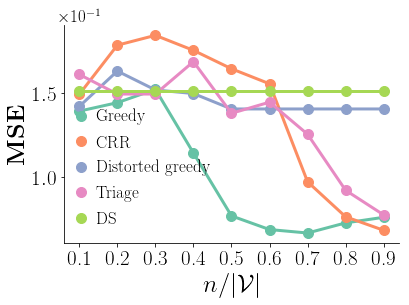

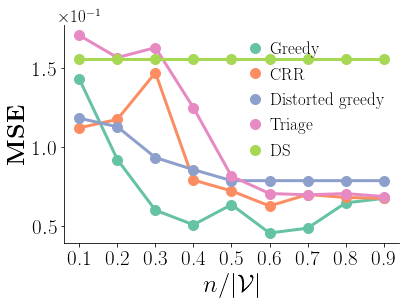

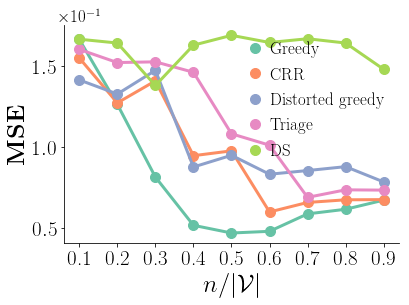

In [4]:
latexify()
for test_method in list_of_test_options:
    fig, ax = plt.subplots()
    for idx,algorithm in enumerate(list_of_algorithms):
        err_K_te = []
        for K in list_of_K:
            err_K_te.append(res[str(std)][str(K)][str(lamb)][algorithm]['test_res'][test_method][test_method]['error'])
            
        ax.plot([err * 10 for err in err_K_te], label=label_map[algorithm], linewidth=3, marker='o',
                markersize=10, color=color_list[idx])
        
    ax.legend(prop={'size': 17}, frameon=False,handlelength=0.2)   
    plt.figtext(0.113, 0.90, r'$\times 10^{-1}$', fontsize=17)
    plt.xlabel(r'$n/ | \mathcal{V} | $', fontsize=25)
    plt.ylabel(r'\textbf{MSE}', fontsize=25, labelpad=2)
    plt.xticks(range(len(list_of_K)), list_of_K)
    

This figures compares the performance of different test methods.

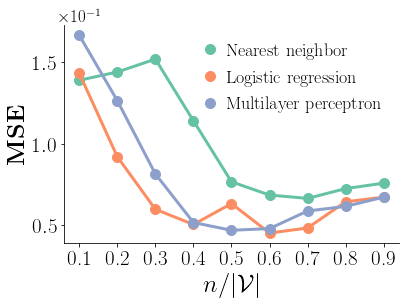

In [5]:
label_map = {'MLP': 'Multilayer perceptron','LR':'Logistic regression','NN':'Nearest neighbor'}
fig, ax = plt.subplots()
for idx,test_method in enumerate(list_of_test_options):
    err_K_te = []
    for K in list_of_K:
        err_K_te.append(
            res[str(std)][str(K)][str(lamb)]['greedy']['test_res'][test_method][test_method]['error'])

    plt.plot([err * 10 for err in err_K_te], label=label_map[test_method], linewidth=3, marker='o',
                     markersize=10, color=color_list[idx])
    
plt.legend(prop={'size': 18}, frameon=False, handlelength=0.2)
plt.xlabel(r'$n/ | \mathcal{V} | $', fontsize=25)
plt.ylabel(r'\textbf{MSE}', fontsize=25, labelpad=2)
plt.figtext(0.113, 0.9, r'$\times 10^{-1}$', fontsize=17)
plt.xticks(range(len(list_of_K)), list_of_K);


# Generate Figures 3, 7 (U-shaped Figures)

These figures show the performance of the proposed Greedy algorithm under different distributions of human errors.

Here we run experiments for Ustare5 as an instance. You can get figures for Ustare11, Umessidor, Ugauss and Usigmoid in the same way.

### Load Data

In [6]:
dataset = 'Ustare5'
res = load_data(path + dataset + '_res')

### Plot Figures

In [7]:
list_of_std = [.2, .4, .6, .8]
lamb = 1

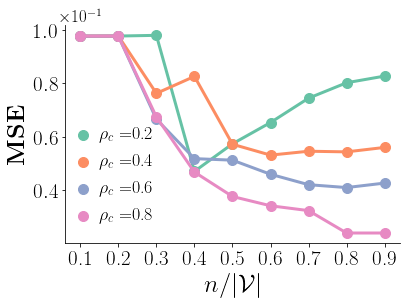

In [8]:
fig, ax = plt.subplots()
for idx, std in enumerate(list_of_std):
    err_K_te = []
    for K in list_of_K:
        err_K_te.append(
            res[str(std)][str(K)][str(lamb)]['greedy']['test_res']['LR']['LR']['error'])

    err_K_te_mult = [10 * err for err in err_K_te]
    ax.plot((err_K_te_mult), label=r'$\rho_c = $' + str(std), linewidth=3, marker='o',
            markersize=10, color=color_list[idx])

ax.legend(prop={'size': 18}, frameon=False, handlelength=0.2, loc='best')
plt.xlabel(r'$n/ | \mathcal{V} | $', fontsize=25)
plt.ylabel(r'\textbf{MSE}', fontsize=25, labelpad=3)
plt.figtext(0.113, 0.9, r'$\times 10^{-1}$', fontsize=17)
plt.xticks(range(len(list_of_K)), list_of_K);

## Generate Figure 1

Figure 1 shows the solution w provided by the greedy algorithm.
Here we run experimtns for Wsigmoid, you can get figures for Wgauss using the same way.

### Load Data

In [9]:
dataset = 'Wsigmoid'
data = load_data('data/data_dict_' + dataset)
res = load_data(path + dataset + '_res')

### Plot Figures

In [10]:
list_of_K = [0.2, 0.4, 0.6, 0.8]
std = 0.001
lamb = 0.001

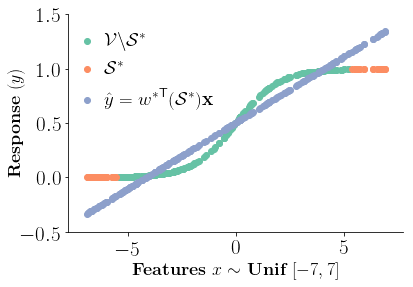

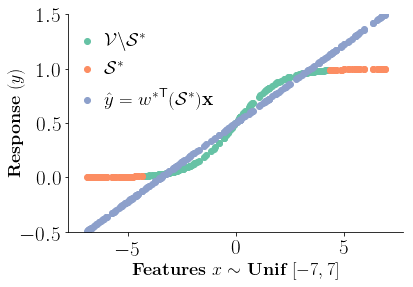

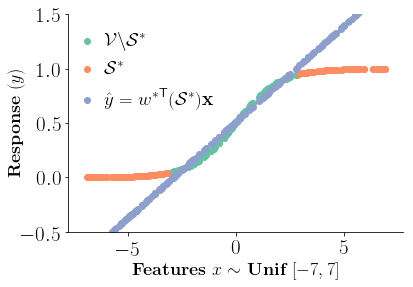

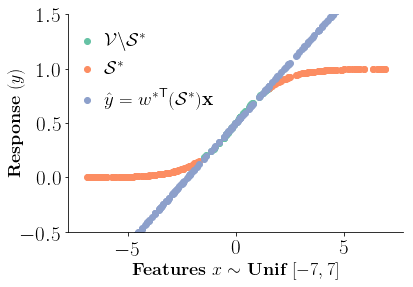

In [11]:
for K in list_of_K:
    local_data = data[str(std)]
    local_res = res[str(std)][str(K)][str(lamb)]['greedy']
    subset_human = local_res['subset']
    w = local_res['w']
    n = local_data['X'].shape[0]
    subset_machine = np.array([i for i in range(n) if i not in subset_human])
    fig, ax = plt.subplots()
    x = local_data['X'][subset_machine, 0].flatten()
    y = local_data['Y'][subset_machine]
    plt.scatter(x, y, c=color_list[0], label=r'$\mathcal{V}$\textbackslash $\mathcal{S}^*$')

    x = local_data['X'][subset_human, 0].flatten()
    y = local_data['Y'][subset_human]
    plt.scatter(x, y, c=color_list[1], label=r'$\mathcal{S}^*$')
    x = local_data['X'][:, 0].flatten()
    y = local_data['X'].dot(w).flatten()
    plt.scatter(x, y, c=color_list[2], label='$\hat y = {w^*}^\mathsf{T}(\mathcal{S}^*) \mathbf{x}$ ')

    xlabel = '$[-7,7]$'
    ax.set_ylim([-0.5, 1.5])
    x = -5

    plt.legend(prop={'size': 19}, frameon=False,
               handlelength=0.2)
    plt.xlabel(r'\textbf{Features} $x$ $\sim$ \textbf{Unif} ' + xlabel, fontsize=18)
    ax.set_ylabel(r'\textbf{Response} $(y)$', fontsize=18, labelpad=x)